In [32]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv('outcomes_df6.csv') 

data['Damage In Area'] = (data['Expected Annual Damage'] > 0).astype(int)
data.head()

,Unnamed: 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Damage In Area
0,0,2.632335e+06,7.228272e+08,1.268900e+09,1
1,1,1.626074e+07,7.700024e+08,5.509000e+08,1
2,2,0.000000e+00,6.103668e+08,9.911000e+08,0
3,3,0.000000e+00,4.631629e+08,6.721000e+08,0
4,4,2.030692e+06,7.867298e+08,1.707600e+09,1


In [34]:
x = data.iloc[:, 2:4]
print(f"Columns in x: {x.columns.values}")

Columns in x: ['Dike Investment Costs' 'RfR Investment Costs']


In [35]:
y = data.iloc[:, 4].values
print(f"Columns in y: {y}")

Columns in y: [1 1 0 0 1]


In [43]:
experiments = pd.read_csv('experiments_df6.csv') 

In [47]:
experiments.head()

,Unnamed: 0,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,0,3.5,3.5,3.5,4,175.0,0.5,1.5,175.0,0.5,...,0,0,8,2,6,5,0,reference,0,dikesnet
1,1,3.5,3.5,3.5,4,175.0,0.5,1.5,175.0,0.5,...,6,5,10,2,9,7,2,reference,1,dikesnet
2,2,3.5,3.5,3.5,4,175.0,0.5,1.5,175.0,0.5,...,10,6,2,10,7,0,4,reference,2,dikesnet
3,3,3.5,3.5,3.5,4,175.0,0.5,1.5,175.0,0.5,...,3,10,6,6,0,10,1,reference,3,dikesnet
4,4,3.5,3.5,3.5,4,175.0,0.5,1.5,175.0,0.5,...,6,3,1,7,2,4,3,reference,4,dikesnet


In [36]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

y = np.array(y)

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)

box1 = prim_alg.find_box()

[MainProcess/INFO] 5 points remaining, containing 3 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.6, coverage: 1.0, density: 1.0 restricted_dimensions: 1


In [37]:
# Enable matplotlib interactive mode
# %matplotlib notebook

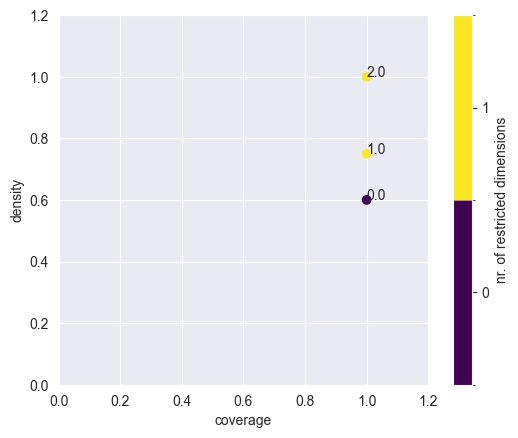

In [38]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff(annotated=True)
plt.show()

In [39]:
point = 2
box1.inspect(point)

coverage    1.0
density     1.0
id          2.0
k           3.0
mass        0.6
mean        1.0
n           3.0
res_dim     1.0
Name: 2, dtype: float64

                              box 2                                
                                min           max qp value qp value
Dike Investment Costs  6.665970e+08  7.867298e+08    0.216      NaN


[None]

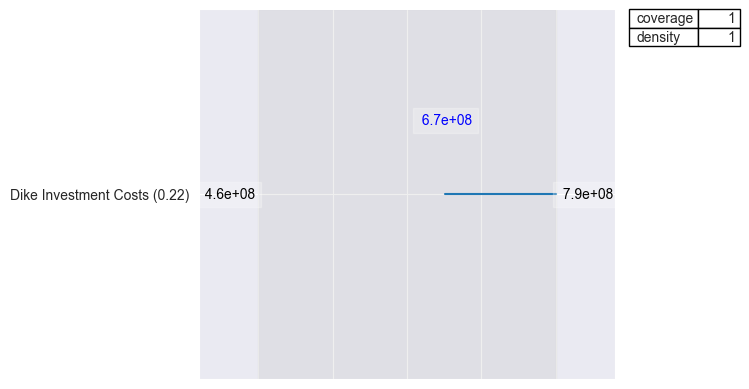

In [40]:
box1.inspect(point, style='graph')
plt.show()

In [41]:
from ema_workbench.analysis import dimensional_stacking

In [42]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)

NameError: name 'cleaned_experiments' is not defined

In [ ]:
# from ema_workbench.analysis import prim
# from ema_workbench import MultiprocessingEvaluator
# 
# # Increase the number of scenarios
# n_scenarios = 2000
# n_policies = 10
# 
# with MultiprocessingEvaluator(dike_model, n_processes=-1) as evaluator:
#     results = evaluator.perform_experiments(n_scenarios, n_policies)
# 
# experiments, outcomes = results
# cleaned_experiments = experiments.drop(labels=[l.name for l in dike_model.levers], axis=1)
# 
# data = outcomes['reliability']
# y = data < np.percentile(data, 10)
# 
# # Adjust PRIM parameters
# prim_alg = prim.Prim(cleaned_experiments, y, threshold=0.7, peel_alpha=0.05, min_box_mass=0.05)
# box1 = prim_alg.find_box()
# 
# # Visualize the trade-off
# box1.show_tradeoff(annotated=True)
# plt.show()
# 
# # Inspect the resulting box
# box1.inspect(0)
# box1.inspect(0, style='graph')
# plt.show()
